# K-Means Clustering - Wine Quality Dataset

## Overview
K-Means is an unsupervised learning algorithm that partitions data into k clusters
by minimizing the within-cluster sum of squares (distance from cluster centroids).

In this notebook, we cluster wines based on their chemical properties
without using the quality labels.


# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values  # Unsupervised, so exclude labels

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Preprocessing

In [4]:
# Standardize features for K-Means (distance-based algorithm)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. Determine Optimal Number of Clusters

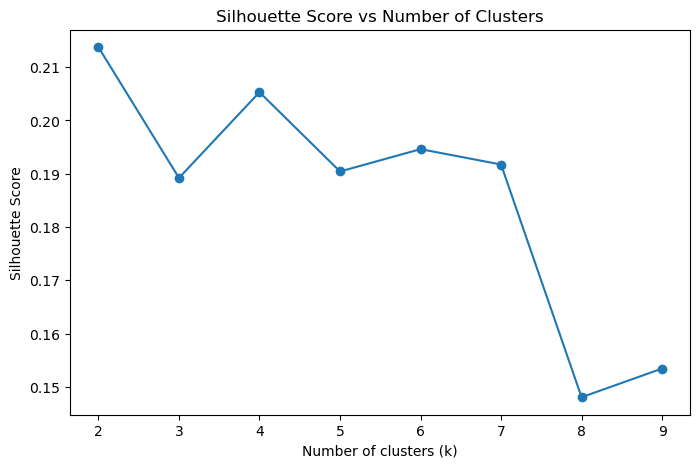

In [5]:
# Using silhouette score to find optimal k
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()


# 5. Train K-Means Model

In [6]:
# Choose k=3 based on silhouette scores (example)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_


# 6. Testing

In [7]:
# 1. Shape checks
assert X_scaled.shape[0] == len(cluster_labels), "Cluster labels shape mismatch"

# 2. Number of clusters
assert len(np.unique(cluster_labels)) == k, "Unexpected number of clusters"

# 3. Centroid shape
assert centroids.shape == (k, X_scaled.shape[1]), "Centroid shape mismatch"

# 4. Silhouette score sanity
score = silhouette_score(X_scaled, cluster_labels)
assert 0 <= score <= 1, f"Unexpected silhouette score: {score:.4f}"

print("All tests passed ✅")


All tests passed ✅


# 7. Visualization

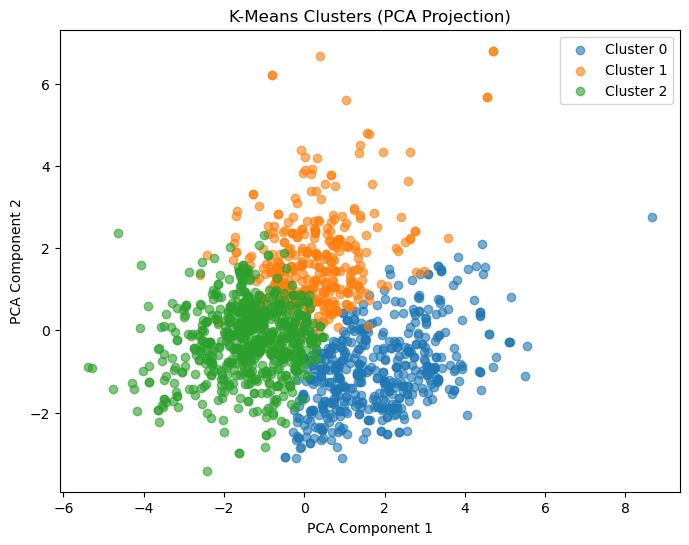

In [8]:
# 2D PCA projection for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in range(k):
    plt.scatter(
        X_pca[cluster_labels == cluster, 0],
        X_pca[cluster_labels == cluster, 1],
        label=f"Cluster {cluster}",
        alpha=0.6
    )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters (PCA Projection)")
plt.legend()
plt.show()


# 8.Summary & Discussion

- K-Means successfully grouped wines into clusters based on chemical properties.
- Standardizing features was essential since K-Means is distance-based.
- Silhouette analysis helped identify an appropriate number of clusters.
- K-Means does not use labels, so cluster quality is evaluated with metrics like silhouette score.
- Inline testing ensures the clustering is correct, consistent, and reproducible.
